In [30]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
from Modules import *

# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df = df.rename(index=str, columns={"default payment next month": "Y"})

df = df.drop('ID',  axis=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Y            30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [4]:
# convert variables from objects into float
df = df.astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
Y            30000 non-null float32
dtypes: float32(24)
memory usage

In [5]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object', name='ID')

In [6]:
# create AVG_BILL_AMT

df["AVG_BILL_AMT"] = ((df.BILL_AMT1 + df.BILL_AMT2 + df.BILL_AMT3 + df.BILL_AMT4 + df.BILL_AMT5 + df.BILL_AMT6)/6)


In [7]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df["AVG_OUT_BAL"] = ((df.OUTSTANDING_BAL1 + df.OUTSTANDING_BAL2 + df.OUTSTANDING_BAL3 + df.OUTSTANDING_BAL4 + df.OUTSTANDING_BAL5 + df.OUTSTANDING_BAL6)/6)


In [8]:
# created new column BAL_INC to flag balances that increased by the final reporting period
df["BAL_INC"] = ((df.OUTSTANDING_BAL1 - df.AVG_OUT_BAL) >0)

print(df.BAL_INC.value_counts())

print(df.BAL_INC.describe())



True     16869
False    13131
Name: BAL_INC, dtype: int64
count     30000
unique        2
top        True
freq      16869
Name: BAL_INC, dtype: object


In [9]:
# created new column %_LIMIT_BAL for each month

df["PER_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["PER_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["PER_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["PER_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["PER_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["PER_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)

df["AVG_PER_LIM_Bal"] = ((df.PER_LIMIT_BAL1 + df.PER_LIMIT_BAL2 + df.PER_LIMIT_BAL3 + df.PER_LIMIT_BAL4 + df.PER_LIMIT_BAL5 + df.PER_LIMIT_BAL6)/6)


In [10]:
## Bin the AVG_BILL_AMT column and replace with 3 bined ranges: "up_to $10k", "from_10k-50k", "above_50k"

labels = ["up_to $10k", "from_10k-50k", "above_50k"]
bins = [-165579, 10000, 50000, 2500000]
df['bin_AVG_BILL_AMT'] = pd.cut(df['AVG_BILL_AMT'], bins, labels = labels)
print(df['bin_AVG_BILL_AMT'].value_counts())
df = df.join(pd.get_dummies(df['bin_AVG_BILL_AMT'], prefix = 'AVG_BILL_AMT'))


from_10k-50k    11263
up_to $10k      10432
above_50k        8305
Name: bin_AVG_BILL_AMT, dtype: int64


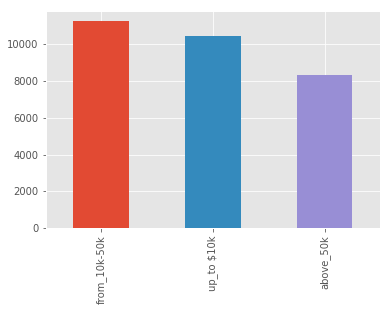

In [11]:
# Bar chart of the bins used for AVG_BILL_AMT

df['bin_AVG_BILL_AMT'].value_counts().plot(kind = "bar")

In [12]:
# Create AVG_PAY_AMT

df['AVG_PAY_AMT'] = ((df.PAY_AMT1 + df.PAY_AMT2 + df.PAY_AMT3 + df.PAY_AMT4 + df.PAY_AMT5 + df.PAY_AMT6)/6)


print((df['AVG_PAY_AMT']).head())

1     114.833336
2     833.333313
3    1836.333374
4    1398.000000
5    9841.500000
Name: AVG_PAY_AMT, dtype: float32


In [13]:
## Bin the AVG_PAY_AMT column and replace with Logical variables

labels = ["up_to $1,500", "from_$1,500-4,000", "above_$4,000"]
bins = [-165579, 1500, 4000, 2500000]
df['bin_AVG_PAY_AMT'] = pd.cut(df['AVG_PAY_AMT'], bins, labels = labels)
print(df['bin_AVG_PAY_AMT'].value_counts())
df = df.join(pd.get_dummies(df['bin_AVG_PAY_AMT'], prefix = 'AVG_PAY_AMT'))


above_$4,000         10432
up_to $1,500         10389
from_$1,500-4,000     9179
Name: bin_AVG_PAY_AMT, dtype: int64


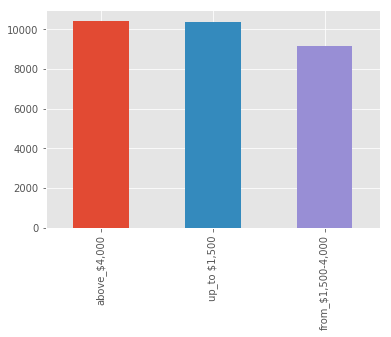

In [14]:
# Bar chart of the bins used for AVG_PAY_AMT

df['bin_AVG_PAY_AMT'].value_counts().plot(kind = "bar")

In [15]:
## Bin the LIMIT BAL column and replace with Logical variables

labels = ["<_80,000", "<=_200,0000", ">_200,000"]
bins = [0, 80000, 200000, 30000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins, labels = labels)
print(df['binned'].value_counts())
df = df.join(pd.get_dummies(df['binned'], prefix = 'Limit Bal'))

<_80,000       10799
>_200,000       9622
<=_200,0000     9579
Name: binned, dtype: int64


2.0    14030
1.0    10585
3.0     4917
4.0      468
Name: EDUCATION, dtype: int64


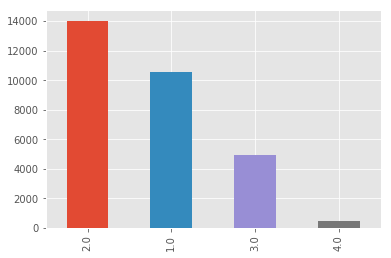

In [16]:
# Education values with scores of 5.0, 6.0 and 0.0 were replaces to the other category of 4.0
# Net result: 1 = Graduate School, 2 = University, 3 = High School, 4 = other

df.EDUCATION = df.EDUCATION.replace([5.0,6.0,0.0],4.0)
df.EDUCATION.value_counts().plot(kind = "bar")
print(df.EDUCATION.value_counts())

2.0    15964
1.0    13659
3.0      377
Name: MARRIAGE, dtype: int64


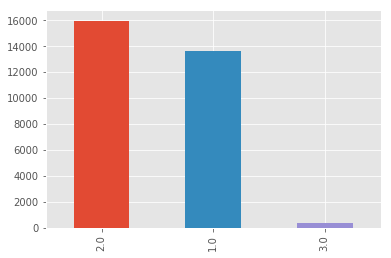

In [17]:
# Replace MARRIAGE values of 0 with 3

df.MARRIAGE = df.MARRIAGE.replace([0.0],3.0)
df.MARRIAGE.value_counts().plot(kind = "bar")
print(df.MARRIAGE.value_counts())

In [18]:
#create logical variable: 
#if the outstanding balance for period t-1 is less than period t: 0
#if the outstanding balance for perriod t-1 is more than period t: 1

lst1 = ['OUTSTANDING_BAL1','OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4','OUTSTANDING_BAL5']
lst2 = ['OUTSTANDING_BAL2','OUTSTANDING_BAL3', 'OUTSTANDING_BAL4', 'OUTSTANDING_BAL5','OUTSTANDING_BAL6',]
for idx, (column1, column2) in enumerate(zip(lst1, lst2)):
    idx += 1
    df[f"OUSTANDING_BAL_{idx}_INDICATOR"] = np.where(df[column1] > df[column2], 1, 0)


#possible idea: do a ratio of how much your outstanding balance grew from t-1 to t ((new-old)/old)

In [19]:
#created new column %_LIMIT_BAL for each month
#oustanding balance of period t divided by LIMIT_BAL 
#how close is a client reaching that LIMIT_BAL limit?

df["PERCENT_OF_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["PERCENT_OF_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)

In [20]:
#if the outstanding balance for period t-1 is less than period t: 0
#if the outstanding balance for perriod t-1 is more than period t: 1

lst1 = ['PERCENT_OF_LIMIT_BAL1', 'PERCENT_OF_LIMIT_BAL2', 'PERCENT_OF_LIMIT_BAL3', 'PERCENT_OF_LIMIT_BAL4', 'PERCENT_OF_LIMIT_BAL5']
lst2 = ['PERCENT_OF_LIMIT_BAL2', 'PERCENT_OF_LIMIT_BAL3', 'PERCENT_OF_LIMIT_BAL4', 'PERCENT_OF_LIMIT_BAL5', 'PERCENT_OF_LIMIT_BAL6']
for idx, (column1, column2) in enumerate(zip(lst1, lst2)):
    idx += 1
    df[f"PERCENT_OF_LIMIT_BAL_{idx}_INDICATOR"] = np.where(df[column1] > df[column2], 1, 0)



In [21]:
#describe the percentage of the bill that clients are paying
#have to set if a bill amt is 0, will be the same as the previous time periods value
#therefore, have to initialize the the time period, t = 6 values first 

lst1 = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5', 'BILL_AMT6']
lst2 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for idx, (col1, col2) in enumerate(zip(lst1, lst2)):
    idx +=1
    df[f"PAY_RATIO_{idx}"] = np.where(df[col1] != 0, df[col2]/df[col1], 1)

In [22]:
#create the indicator
#if the ratio is increasing across the months we will give them a 1, 0 if is the same or decreasing.

df.loc[df["PAY_RATIO_1"] < df["PAY_RATIO_2"], 'PAY_RATIO_1_INDICATOR'] = (1*(5/5)) 
df.loc[df["PAY_RATIO_1"] >= df["PAY_RATIO_2"], 'PAY_RATIO_1_INDICATOR'] = 0 

df.loc[df["PAY_RATIO_2"] < df["PAY_RATIO_3"], 'PAY_RATIO_2_INDICATOR'] = (1*(4/5))
df.loc[df["PAY_RATIO_2"] >= df["PAY_RATIO_3"], 'PAY_RATIO_2_INDICATOR'] = 0

df.loc[df["PAY_RATIO_3"] < df["PAY_RATIO_4"], 'PAY_RATIO_3_INDICATOR'] = (1*(3/5))
df.loc[df["PAY_RATIO_3"] >= df["PAY_RATIO_4"], 'PAY_RATIO_3_INDICATOR'] = 0 

df.loc[df["PAY_RATIO_4"] < df["PAY_RATIO_5"], 'PAY_RATIO_4_INDICATOR'] = (1*(2/5)) 
df.loc[df["PAY_RATIO_4"] >= df["PAY_RATIO_5"], 'PAY_RATIO_4_INDICATOR'] = 0

df.loc[df["PAY_RATIO_5"] < df["PAY_RATIO_6"], 'PAY_RATIO_5_INDICATOR'] = (1*(1/5)) 
df.loc[df["PAY_RATIO_5"] >= df["PAY_RATIO_6"], 'PAY_RATIO_5_INDICATOR'] = 0

In [23]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y',
       'AVG_BILL_AMT', 'OUTSTANDING_BAL1', 'OUTSTANDING_BAL2',
       'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4', 'OUTSTANDING_BAL5',
       'OUTSTANDING_BAL6', 'AVG_OUT_BAL', 'BAL_INC', 'PER_LIMIT_BAL1',
       'PER_LIMIT_BAL2', 'PER_LIMIT_BAL3', 'PER_LIMIT_BAL4', 'PER_LIMIT_BAL5',
       'PER_LIMIT_BAL6', 'AVG_PER_LIM_Bal', 'bin_AVG_BILL_AMT',
       'AVG_BILL_AMT_up_to $10k', 'AVG_BILL_AMT_from_10k-50k',
       'AVG_BILL_AMT_above_50k', 'AVG_PAY_AMT', 'bin_AVG_PAY_AMT',
       'AVG_PAY_AMT_up_to $1,500', 'AVG_PAY_AMT_from_$1,500-4,000',
       'AVG_PAY_AMT_above_$4,000', 'binned', 'Limit Bal_<_80,000',
       'Limit Bal_<=_200,0000', 'Limit Bal_>_200,000',
       'OUSTANDING_BAL_1_INDICATOR', 'OUSTANDIN

In [33]:
#drop the features that are used in calculating other features

df_no = df.drop(columns = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_BILL_AMT', 'OUTSTANDING_BAL1', 'OUTSTANDING_BAL2','OUTSTANDING_BAL3', 'OUTSTANDING_BAL4', 'OUTSTANDING_BAL5','OUTSTANDING_BAL6', 'PER_LIMIT_BAL2', 'PER_LIMIT_BAL3', 'PER_LIMIT_BAL4', 'PER_LIMIT_BAL5',
       'PER_LIMIT_BAL6', 'OUSTANDING_BAL_2_INDICATOR', 'OUSTANDING_BAL_3_INDICATOR', 'OUSTANDING_BAL_4_INDICATOR', 'OUSTANDING_BAL_5_INDICATOR', 'PERCENT_OF_LIMIT_BAL2', 'PERCENT_OF_LIMIT_BAL3',
       'PERCENT_OF_LIMIT_BAL4', 'PERCENT_OF_LIMIT_BAL5','PERCENT_OF_LIMIT_BAL6', 'PERCENT_OF_LIMIT_BAL_2_INDICATOR', 'PERCENT_OF_LIMIT_BAL_3_INDICATOR',
       'PERCENT_OF_LIMIT_BAL_4_INDICATOR', 'PERCENT_OF_LIMIT_BAL_5_INDICATOR', 'PAY_RATIO_2', 'PAY_RATIO_3', 'PAY_RATIO_4','PAY_RATIO_5', 'PAY_RATIO_6', 'PAY_RATIO_2_INDICATOR', 'PAY_RATIO_3_INDICATOR',
       'PAY_RATIO_4_INDICATOR', 'PAY_RATIO_5_INDICATOR'])

evaluate_baseline(df_no)

ValueError: could not convert string to float: '<=_200,0000'

In [27]:
df_no.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'AVG_OUT_BAL', 'BAL_INC', 'PER_LIMIT_BAL1',
       'AVG_PER_LIM_Bal', 'bin_AVG_BILL_AMT', 'AVG_BILL_AMT_up_to $10k',
       'AVG_BILL_AMT_from_10k-50k', 'AVG_BILL_AMT_above_50k', 'AVG_PAY_AMT',
       'bin_AVG_PAY_AMT', 'AVG_PAY_AMT_up_to $1,500',
       'AVG_PAY_AMT_from_$1,500-4,000', 'AVG_PAY_AMT_above_$4,000', 'binned',
       'Limit Bal_<_80,000', 'Limit Bal_<=_200,0000', 'Limit Bal_>_200,000',
       'OUSTANDING_BAL_1_INDICATOR', 'PERCENT_OF_LIMIT_BAL1',
       'PERCENT_OF_LIMIT_BAL_1_INDICATOR', 'PAY_RATIO_1',
       'PAY_RATIO_1_INDICATOR'],
      dtype='object')